In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv

# Original Image

(480, 640, 3)


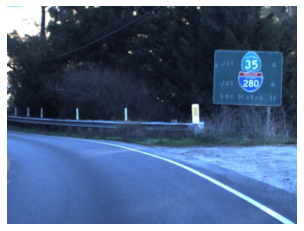

In [5]:
original_img1 = mpimg.imread('original_images/img1.jpg')
print(original_img1.shape)
plt.imshow(original_img1)
plt.axis('off');

# Resized Image

(100, 100, 3)


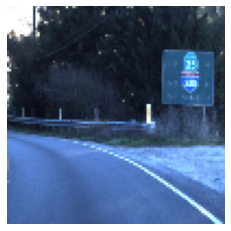

In [6]:
resized_img3 = cv.resize(original_img1, dsize=(100,100))
print(resized_img3.shape)
plt.imshow(resized_img3)
plt.axis('off');

# Created image

(3, 100, 100)
(100, 100, 3)


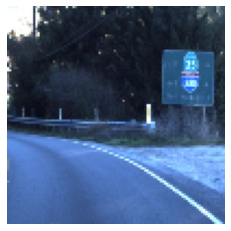

In [2]:
created_img = np.load('generated_properties/orig_img1.npy')
print(created_img.shape)
created_img = np.moveaxis(created_img, 0, -1) / 255
print(created_img.shape)
plt.imshow(created_img)
plt.axis('off');

# Counter-example

(1, 3, 100, 100)
(100, 100, 3)


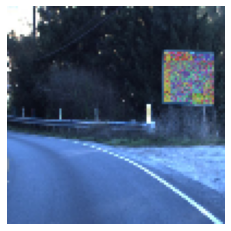

In [3]:
counter_example = np.load('counter_examples/prop1_ce.npy')
print(counter_example.shape)
counter_example = np.moveaxis(counter_example[0], 0, -1)
print(counter_example.shape)
plt.imshow(counter_example)
plt.axis('off');

# Bounds

In [9]:
lb = np.load('generated_properties/lb1.npy') / 255.0
ub = np.load('generated_properties/ub1.npy') / 255.0
print(lb.shape)
lb = np.moveaxis(lb, 0, -1)
ub = np.moveaxis(ub, 0, -1)
print(lb.shape)

(3, 100, 100)
(100, 100, 3)


In [10]:
lb.max()

1.0

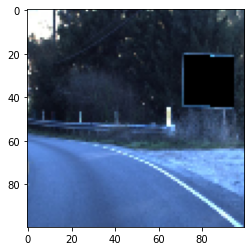

In [11]:
plt.imshow(lb)

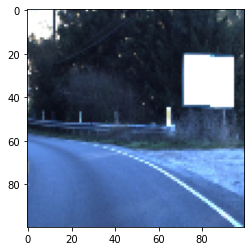

In [12]:
plt.imshow(ub)

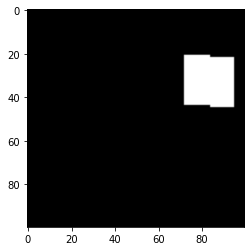

In [13]:
plt.imshow(ub-lb)

# ONNX (This section will be deleted)

In [4]:
import onnxruntime as rt
import matplotlib.pyplot as plt

sess = rt.InferenceSession("onnx/dave_small.onnx")
input_name = sess.get_inputs()[0].name

In [5]:
from pathlib import Path
from dnnv.nn import parse
dnn = parse(Path("onnx/dave_small.onnx")).simplify()

(3, 100, 100)

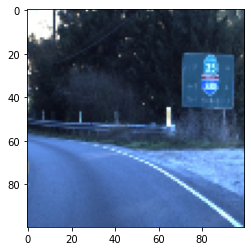

In [16]:
original_img = np.load('generated_properties/orig_img1.npy') / 255
# original_img = np.load('/home/ft/Downloads/neurifydave_benchmark/properties/dave_small_image3.npy') / 255
plt.imshow(np.moveaxis(original_img, 0, -1))
original_img.shape

In [7]:
pred_onnx = sess.run(None, {input_name: original_img.astype(np.float32).reshape(1,3,100,100)})[0]
print(f"Rad: {pred_onnx}")
print(f"Deg: {pred_onnx*180/np.pi}")

Rad: [[0.13923965]]
Deg: [[7.977844]]


In [8]:
pred = dnn(original_img.astype(np.float32).reshape(1,3,100,100))
print(f"Rad: {pred}")
print(f"Deg: {pred*180/np.pi}")

Rad: [[0.13923961]]
Deg: [[7.977842]]


In [9]:
bef = dnn[:-2](original_img.astype(np.float32).reshape(1,3,100,100))
bef

array([[0.0697325]], dtype=float32)

In [77]:
counter_example = np.load('counter_examples/prop1_ce.npy')
# counter_example = np.load('/home/ft/Desktop/DNNF/counter_example1.npy')
# counter_example = np.load('experiments/falsifiers/BIM/counter_examples/ce_property7.npy')
counter_example.shape

(1, 3, 100, 100)

In [78]:
pred2_onnx = sess.run(None, {input_name: counter_example})[0]
print(f"Rad: {pred2_onnx}")
print(f"Deg: {pred2_onnx*180/np.pi}")

Rad: [[0.4108869]]
Deg: [[23.542086]]


In [79]:
pred2 = dnn(counter_example)
print(f"Rad: {pred2}")
print(f"Deg: {pred2*180/np.pi}")

Rad: [[0.41088685]]
Deg: [[23.542082]]


In [80]:
bef2 = dnn[:-2](counter_example)
bef2

array([[0.20838346]], dtype=float32)

In [81]:
np.abs(pred_onnx.item() - pred2_onnx.item()) * 180 / np.pi

15.564241490974135

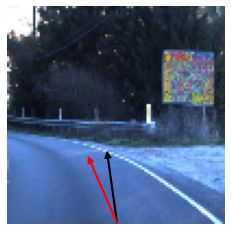

In [82]:
plt.imshow(np.moveaxis(counter_example[0], 0, -1))

x = np.cos((90 * np.pi / 180) + pred_onnx).item() * 30
y = np.sin((90 * np.pi / 180) + pred_onnx).item() * 30

x2 = np.cos((90 * np.pi / 180) + pred2_onnx).item() * 30
y2 = np.sin((90 * np.pi / 180) + pred2_onnx).item() * 30

plt.arrow(50, 99, x, -y, width = 0.5, head_width=3, head_length=3, color='black')
plt.arrow(50, 99, x2, -y2, width = 0.5, head_width=3, head_length=3, color='red')

plt.axis('off');